# Import methods

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from plotnine import *

#sklearn 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer #to put values to NaN
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline 
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
#metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn import metrics 

# Import dataset

In [2]:
df=pd.read_csv('films2020_2021_2022_visu.csv', encoding='utf-8-sig',sep=";")
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor_2,actor_3,note_presse,note_spectators,Scenar,...,real_awards,first_actor_awards,second_actor_awards,length_corrected,day,month,year,note_spectator_word,nomi,note_spectators_binary
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,0.0,0.0,0.0,87,5,mai,2023,bad,0,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,1.0,0.0,0.0,94,12,août,2022,soso,0,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,3.2,3.6,Philippe Lioret,...,4.0,0.0,0.0,94,4,janvier,2023,good,1,1
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,0.0,0.0,0.0,100,15,juillet,2022,soso,0,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,0.0,0.0,0.0,106,27,avril,2022,bad,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,White Building,Drame,NaN,Kavich Neang,Piseth Chhun,Sithan Hout,Sokha Uk,3.5,2.8,Kavich Neang,...,0.0,0.0,0.0,90,22,décembre,2021,soso,4,0
3280,Who's the Boss,Comédie,Romance,Chinaza Onuzo,Funke Akindele,Blossom Chukwujekwu,Sharon Ooja,NaN,2.9,NaN,...,0.0,0.0,0.0,105,25,octobre,2022,soso,0,0
3281,Why Moths Fly to the Light?,Drame,NaN,Zaur Dzhafarov,Anita Shmatova,Arthur Valente,NaN,NaN,3.0,NaN,...,0.0,0.0,0.0,62,15,mars,2021,soso,0,0
3282,Wildland,Policier,Thriller,Jeanette Nordahl,Sandra Guldberg Kampp,Sidse Babett Knudsen,Joachim Fjelstrup,NaN,1.9,Ingeborg Topsøe,...,0.0,0.0,1.0,88,9,novembre,2021,bad,0,0


Proportion of each type

In [3]:
df.note_spectators_binary.value_counts(normalize=True)

0    0.624543
1    0.375457
Name: note_spectators_binary, dtype: float64

Drop the redundant variables

In [4]:
df=df.drop(["note_spectator_word","note_spectators"], axis=1)

Create the X (features) and y (target) classes

In [5]:
y=df['note_spectators_binary'] #target y
X=df.drop(columns='note_spectators_binary') #all other variables

Train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#it will be set to 0.25.for the test size and 75% for train if no value specified

In [7]:
print("--- Total ---")
print(y.value_counts(normalize=True))
#normalize = True => in %
print("--- Train ---")
print(y_train.value_counts(normalize=True))
print("--- Test ---")
print(y_test.value_counts(normalize=True))

--- Total ---
0    0.624543
1    0.375457
Name: note_spectators_binary, dtype: float64
--- Train ---
0    0.617946
1    0.382054
Name: note_spectators_binary, dtype: float64
--- Test ---
0    0.644336
1    0.355664
Name: note_spectators_binary, dtype: float64


In [8]:
#We have different types of variables
#I list variables in function of what they correspond to
film = ["Titre", "genre1",'genre2','note_presse', "nationality_1","language","length_corrected","day","month","nomi","year"]

In [9]:
#Related to actors
actors = [
    "actor_1",
    "actor_2",
    'actor_3',
    "first_actor_awards",
    "second_actor_awards",
]
#Related to director and writer
director = [
    "réalisateur_1",
    'real_awards',
    'distributor',
    'Scenar',
]

In [10]:
M= ["actor_1","length_corrected","nationality_1","language","genre1","réalisateur_1","first_actor_awards", "nomi","note_presse","real_awards"]

As we saw in the heatmap that length_corrected, language, nomi, note_presse were correlated with success we take them. We also take some variables that we think are important.

In [11]:
#only take the variables defined above
X_train_M=X_train[M]
X_test_M =X_test[M]

In [12]:
#2 dictionaries to keep the performancies
test_accuracy={}
test_auc_roc={}

In [13]:
dectree = tree.DecisionTreeClassifier( #Classifier as we are in a classification problem
    
    random_state=42,
    max_depth=10, # to limit the size of our tree (indeed it would go until the last leaf otherwise)
)

In [14]:
#how I will handle the categorical and numerical vraiables
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X_train_M)
categorical_columns

['actor_1', 'nationality_1', 'language', 'genre1', 'réalisateur_1']

In [15]:
categorical_transformer= Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), #say how I will fill the missing values (here by missing)
    ('encoder', OneHotEncoder(handle_unknown='ignore'))]

)

In [16]:
numeric_columns = [col for col in X_train_M.columns if col not in categorical_columns]
numeric_columns

['length_corrected',
 'first_actor_awards',
 'nomi',
 'note_presse',
 'real_awards']

In [17]:
numeric_transformer= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean', fill_value='missing')), 
        ("scaler", StandardScaler())]
)
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(fill_value='missing')),
                ('scaler', StandardScaler())])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns),    
]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing')),
                                                 ('scaler', StandardScaler())]),
                                 ['length_corrected', 'first_actor_awards',
                                  'nomi', 'note_presse', 'real_awards']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['actor_1', 'nationality_1', 'language',
                                  'genre1', 'réalisateur_1'])])

In [19]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
Dec_tree_M = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", dectree)]
)
Dec_tree_M

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first_actor_awards', 'nomi',
                                                   'note_presse',
                                                   'real_awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                      

# Fitting
Now that we have our pipeline, we can fit

In [20]:
Dectree = Dec_tree_M.fit(X_train_M, y_train)

# Analyse results

In [21]:
y_test_hat = Dec_tree_M.predict(X_test_M)
y_test_hat_probs = Dec_tree_M.predict_proba(X_test_M)[:,1]

test_accuracy['tree_m'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['tree_m'] = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['tree_m'])
print('Testing accuracy: %.4f %%' % test_accuracy['tree_m']) 

Confusion matrix:
 [[406 123]
 [120 172]]
Testing AUC: 69.6500 %
Testing accuracy: 70.4019 %


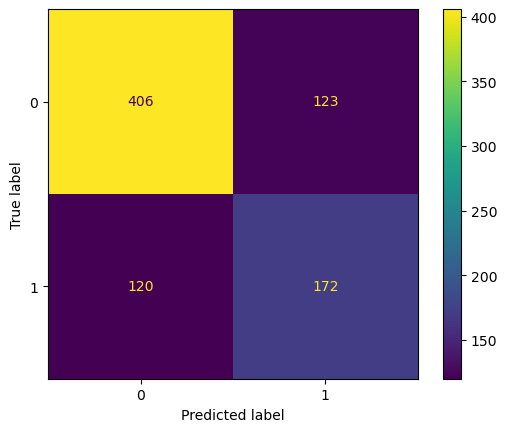

In [22]:
conf_matrix = metrics.confusion_matrix(y_test, y_test_hat) #to have a more visual confusion matrix
true_neg, false_pos,false_neg, true_pos = conf_matrix.ravel()
fig = metrics.ConfusionMatrixDisplay(conf_matrix)
fig.plot() #  Creates the figure
plt.savefig('confutree.pdf')

In [23]:
specificity = true_neg / (true_neg + false_pos)
print("Optimal Specificity:", specificity)
sensitivity =true_pos / (true_pos + false_neg)
print("Optimal Sensitivity:", sensitivity)

Optimal Specificity: 0.7674858223062382
Optimal Sensitivity: 0.589041095890411


In [24]:
Dectree

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first_actor_awards', 'nomi',
                                                   'note_presse',
                                                   'real_awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                      

In [25]:
name_cat =Dec_tree_M['preprocessor'].transformers_[1][1]\
    ['encoder'].get_feature_names_out(categorical_columns) 
#As we used oneHotencoder, our catagorical variables have been transformed into multiple variables => we " lost" the names

In [26]:
name_cat

array(['actor_1_Aamir Khan', 'actor_1_Aamu Milonoff',
       'actor_1_Abbi Jacobson', ..., 'réalisateur_1_Ángel Gomez',
       'réalisateur_1_Ángeles Cruz', 'réalisateur_1_Łukasz Grzegorzek'],
      dtype=object)

In [27]:
name= np.append(numeric_columns,name_cat) #to have all the names (with the ones of teh numerical values)

In [28]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(name)
#to check if all the values are there

['length_corrected' 'first_actor_awards' 'nomi' 'note_presse'
 'real_awards' 'actor_1_Aamir Khan' 'actor_1_Aamu Milonoff'
 'actor_1_Abbi Jacobson' 'actor_1_Abhishek Bachchan'
 'actor_1_Abigail Cowen' 'actor_1_Abimana Aryasatya'
 'actor_1_Aboubakr Bensaihi' 'actor_1_Acha Septriasa'
 'actor_1_Achouackh Abakar' 'actor_1_Adam Brody' 'actor_1_Adam Copeland'
 'actor_1_Adam Devine' 'actor_1_Adam Driver' 'actor_1_Adam Rodriguez'
 'actor_1_Adam Sandler' 'actor_1_Adan Canto' 'actor_1_Adarsh Gourav'
 'actor_1_Addison Rae' 'actor_1_Adi Putra' 'actor_1_Aditya Modak'
 'actor_1_Adrianna Chlebicka' 'actor_1_Adrien Brody'
 'actor_1_Adrien Dussaiwoir' 'actor_1_Adrien Stoclet'
 'actor_1_Adrienne Barbeau' 'actor_1_Adrián Rossi' 'actor_1_Adrián Suar'
 'actor_1_Adunni Ade' 'actor_1_Adèle Exarchopoulos'
 'actor_1_Afef Ben Mahmoud' 'actor_1_Agata Buzek' 'actor_1_Agathe Bosch'
 'actor_1_Aglaia Szyszkowitz' 'actor_1_Agustina Milstein'
 'actor_1_Ah-In Yoo' 'actor_1_Ahan Shetty' 'actor_1_Ahmed Sylla'
 'actor_1_Ah

# Plot the tree

In [ ]:
dtree = plt.figure(figsize=(10, 8))
plot_tree(Dec_tree_M.named_steps['classifier'],feature_names=name,filled=True, rounded=True, precision=4)
dtree.savefig('tree.pdf')
plt.show()

# Improve model?
# NB: we ran them ( sensitivity 0.02 and specificity 0.99) and then cleared the notebook for it to be clearer. We decided not to run them again after clearing as it took hours and did not give good results

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
criterion = ['gini', 'entropy']
# The function used to compute the quality of the split
max_depth = range(1, 10)
max_leaf_nodes = range(2, 20, 2)
min_samples_split = range(2, 20, 2)
# The minimum number of samples to split an internal node
min_samples_leaf = range(1, 50, 5)
# The minimum number of samples to be at a leaf
max_features = ['auto', 'sqrt', 'log2']

In [ ]:
parameters_grid = {
    'classifier__criterion': criterion, 
    'classifier__max_depth': max_depth,
    'classifier__max_leaf_nodes': max_leaf_nodes,
    'classifier__min_samples_split': min_samples_split, 
    'classifier__min_samples_leaf': min_samples_leaf, 
    'classifier__max_features': max_features 
}

In [ ]:
search = GridSearchCV(Dec_tree_M2, parameters_grid, scoring='accuracy')
search.fit(X_train_M2, y_train) 

In [ ]:
search_estimator = search.best_estimator_
print(search_estimator)

In [ ]:
from sklearn import metrics 
search_y_pred = search_estimator.predict(X_test_M2)
search_conf_matrix = metrics.confusion_matrix(y_test, search_y_pred)
search_true_neg, search_false_pos, search_false_neg, search_true_pos = search_conf_matrix.ravel()

In [ ]:
search_specificity = search_true_neg / (search_true_neg + search_false_pos)
print("Optimal Specificity:", search_specificity)

In [ ]:
search_sensitivity = search_true_pos / (search_true_pos + search_false_neg)
print("Optimal Sensitivity:", search_sensitivity)

We can see that it does not improve the model as there is a really low sensitivity (=> do not recognize the good films and put all of them in bad)

In [ ]:
y_test_hat = Dec_tree_M2.predict(X_test_M2)
y_test_hat_probs = Dec_tree_M2.predict_proba(X_test_M2)[:,1]

test_accuracy['tree_m2'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['tree_m2'] = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['tree_m2'])
print('Testing accuracy: %.4f %%' % test_accuracy['tree_m2']) 

In [ ]:
search_bis = GridSearchCV(Dec_tree_M2, parameters_grid, scoring='recall')
search_bis.fit(X_train_M2, y_train) 

In [ ]:
search_bis_estimator = search_bis.best_estimator_
print(search_bis_estimator)

In [ ]:
from sklearn import metrics 
search_bis_y_pred = search_bis_estimator.predict(X_test_M2)
search_bis_conf_matrix = metrics.confusion_matrix(y_test, search_bis_y_pred)
search_bis_true_neg, search_bis_false_pos, search_bis_false_neg, search_bis_true_pos = search_bis_conf_matrix.ravel()

In [ ]:
search_bis_specificity = search_bis_true_neg / (search_bis_true_neg + search_bis_false_pos)
print("Optimal Specificity:", search_bis_specificity)

In [ ]:
search_bis_sensitivity = search_bis_true_pos / (search_bis_true_pos + search_bis_false_neg)
print("Optimal Sensitivity:", search_bis_sensitivity)

In [ ]:
search_ter = GridSearchCV(Dec_tree_M2, parameters_grid, scoring='precision')
search_ter.fit(X_train_M2, y_train) 

In [ ]:
search_ter_estimator = search_ter.best_estimator_
print(search_ter_estimator)

In [ ]:
from sklearn import metrics 
search_ter_y_pred = search_ter_estimator.predict(X_test_M2)
search_ter_conf_matrix = metrics.confusion_matrix(y_test, search_ter_y_pred)
search_ter_true_neg, search_ter_false_pos, search_ter_false_neg, search_ter_true_pos = search_ter_conf_matrix.ravel()

In [ ]:
search_ter_sensitivity = search_ter_true_pos / (search_ter_true_pos + search_ter_false_neg)
print("Optimal Sensitivity:", search_ter_sensitivity)

Same conclusion as for the first optimization => we do not really improve the model